# Importing and Exploring the data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_semicond00 = pd.read_csv("/Users/sree/Downloads/PGP_AIML/DataSets/05-21-AC_Week3-Featurization-ModelSelection & Tuning/signal-data.csv")
print(df_semicond00.head(5),'\n')
print('Shape of Dataset\n',df_semicond00.shape,'\n')
print('Size of Dataset\n',df_semicond00.size,'\n')

                  Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  P

In [3]:
print('\nColumn Datatypes Info\n',df_semicond00.dtypes,'\n')
# Get the unique values of 'Pass/Fail' column
print('\nUnique values in Pass/Fail column\n',df_semicond00["Pass/Fail"].unique())
print('\n Above is the Info of the dataset in detail\n',df_semicond00.info(),'\n')

print('\nDescription of Dataset\n',df_semicond00.describe(),'\n')




Column Datatypes Info
 Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object 


Unique values in Pass/Fail column
 [-1  1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB

 Above is the Info of the dataset in detail
 None 


Description of Dataset
                  0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  

In [4]:
##Identify duplicates records in the data
dupes = df_semicond00.duplicated()
print("Duplicated record count in the dataset is\n",sum(dupes))


# Checking for missing values
print("\nMissing value Details\n",df_semicond00.isna().sum(),"\n")


##number of missing values (only the ones recognised as missing values) in each of the attributes
pd.DataFrame( df_semicond00.isnull().sum(), columns= ['Number of missing values'])

Duplicated record count in the dataset is
 0

Missing value Details
 Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64 



,Number of missing values
Time,0
0,6
1,7
2,14
3,14
...,...
586,1
587,1
588,1
589,1


In [5]:
#df_semicond01 = pd.DataFrame(df_semicond00)


print(df_semicond00.head(5),"\n")
columnNames1 = df_semicond00.columns
print(columnNames1)
columnNames2 = columnNames1.tolist()
print(columnNames2)
# Replace NaN values with the median of the column

for x in columnNames1:
     if x != 'Time':
        df_semicond00[x].fillna(df_semicond00[x].median(), inplace = True) 

             

                  Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  P

In [6]:
# number of missing values (only the ones recognised as missing values) in each of the attributes/columns 
# in the corrected dataset
pd.DataFrame(df_semicond00.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
Time,0
0,0
1,0
2,0
3,0
...,...
586,0
587,0
588,0
589,0


In [7]:
#Imputed dataset
print(df_semicond00.head(5))

                  Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...   72.2889  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...   72.2889  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  P

In [8]:
# Remove column 'Time' as it is unique for each record/observation 
# plays negligible role in our analysis
df_semicond01 = df_semicond00.drop(['Time'], axis = 1)

print('Shape of Corrected Dataset\n',df_semicond01.shape,'\n')
print('Size of Corrected Dataset\n',df_semicond01.size,'\n')
print('Print Sample data from corrected/imputed dataframe\n',df_semicond01.head(5),'\n')

print('Shape of Original Dataset\n',df_semicond00.shape,'\n')

Shape of Corrected Dataset
 (1567, 591) 

Size of Corrected Dataset
 926097 

Print Sample data from corrected/imputed dataframe
          0        1          2          3       4      5         6       7  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   

        8       9  ...       581     582     583     584      585     586  \
0  1.5005  0.0162  ...   72.2889  0.5005  0.0118  0.0035   2.3630  0.0205   
1  1.4966 -0.0005  ...  208.2045  0.5019  0.0223  0.0055   4.4447  0.0096   
2  1.4436  0.0041  ...   82.8602  0.4958  0.0157  0.0039   3.1745  0.0584   
3  1.4882 -0.0124  ...   73.8432  0.4990  0.0103  0.0025   2.0544  0.0202   
4  1.5031 -0.003

In [9]:
from sklearn.preprocessing import StandardScaler
Zeescaler = StandardScaler()

X0 = df_semicond01.drop(["Pass/Fail"],axis = 1)
y = df_semicond01["Pass/Fail"]
ZeeScaledDF = pd.DataFrame(Zeescaler.fit_transform(X0))

print(df_semicond01.shape,"\n")

print(ZeeScaledDF.head(5))

(1567, 591) 

        0         1         2         3         4    5         6         7    \
0  0.224463  0.849523 -0.436430  0.035804 -0.050121  0.0 -0.564354  0.265894   
1  1.107287 -0.383106  1.016977  0.155282 -0.059585  0.0  0.197639  0.321868   
2 -1.114000  0.798901 -0.481447  0.688278 -0.047447  0.0 -0.906768  0.254699   
3 -0.350156 -0.199072 -0.051705 -1.104376 -0.050831  0.0  0.502662 -0.013974   
4  0.242296  0.087328  1.117227 -0.156616 -0.047033  0.0 -0.115954  0.187531   

        8         9    ...       580       581       582        583  \
0  0.509848  1.128455  ... -0.138300 -0.179550  0.118679  -0.204833   
1  0.457021  0.022620  ...  0.516737  2.233265  0.530183   0.406734   
2 -0.260885  0.327222  ...  4.950839  0.008115 -1.262799   0.022320   
3  0.343240 -0.765369  ... -0.289463 -0.151957 -0.322218  -0.292200   
4  0.545066 -0.149545  ... -0.138300 -0.179550 -5.906917  26.867221   

         584        585       586       587       588       589  
0  -0.093165

In [10]:
# Print the analysis of Standardised Dataset
ZeeScaledDF.describe()



,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
count,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1567.0,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,...,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03
mean,1.626934e-15,-5.044111e-15,-5.769228e-15,-4.202835e-16,-3.422951e-17,0.0,-3.233604e-16,1.144107e-15,1.709262e-18,9.850395e-18,...,3.352987e-16,-2.706479e-17,-1.221316e-15,1.914019e-16,-1.413639e-16,-9.835782e-17,2.248078e-16,1.095964e-17,-1.765942e-16,-2.666448e-16
std,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,0.0,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,...,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00
min,-3.691957e+00,-4.203310e+00,-4.762831e+00,-3.173512e+00,-6.222216e-02,0.0,-3.058505e+00,-1.363794e+01,-3.682453e+00,-3.480291e+00,...,-2.002639e+00,-1.462844e+00,-6.553566e+00,-5.426516e-01,-5.772865e-01,-5.230020e-01,-3.105818e+00,-1.508045e+00,-1.494750e+00,-1.062000e+00
25%,-6.503981e-01,-5.359071e-01,-6.622727e-01,-7.084372e-01,-5.622777e-02,0.0,-5.120782e-01,-8.114205e-02,-6.990788e-01,-6.594210e-01,...,-1.383004e-01,-1.795498e-01,-6.455427e-01,-2.164823e-01,-2.007475e-01,-2.128579e-01,-6.483900e-01,-6.673285e-01,-6.920399e-01,-5.891616e-01
50%,-4.018045e-02,4.412441e-02,1.752516e-02,-2.505568e-01,-5.089487e-02,0.0,6.375039e-02,6.438927e-02,-1.706789e-02,-3.035361e-02,...,-1.383004e-01,-1.795498e-01,3.049985e-02,-8.834434e-02,-6.626934e-02,-8.668888e-02,-7.755412e-02,-1.901650e-01,-2.383342e-01,-2.957528e-01
75%,5.731002e-01,5.346326e-01,5.959343e-01,4.430015e-01,-4.729325e-02,0.0,5.499118e-01,2.211153e-01,7.313154e-01,6.119573e-01,...,-1.383004e-01,-1.795498e-01,6.624526e-01,6.891587e-02,6.820885e-02,6.357298e-02,4.973302e-01,4.346919e-01,3.898738e-01,1.608933e-01
max,4.654514e+00,4.371107e+00,3.905635e+00,5.275584e+00,1.979761e+01,0.0,4.532608e+00,7.584617e-01,2.621576e+00,5.015429e+00,...,1.190432e+01,1.162602e+01,2.852243e+00,2.686722e+01,2.707143e+01,2.691334e+01,6.586246e+00,7.205869e+00,8.137772e+00,6.795494e+00


In [11]:
# Place the DataFrames side by side - by columns
ZeeScaledDF1 = pd.concat([ZeeScaledDF, y], axis=1) # stack dataframes by columns
ZeeScaledDF1 = ZeeScaledDF1.reset_index(drop=True)
print(ZeeScaledDF1.head(5),'\n')
print('Shape of Merged Dataset\n',ZeeScaledDF1.shape,'\n')
New_Size = ZeeScaledDF1.size
print('Size of Merged Dataset\n',New_Size,'\n')

columnNames3 = ZeeScaledDF1.columns
columnNames4 = columnNames3.tolist()
print(columnNames4)

          0         1         2         3         4    5         6         7  \
0  0.224463  0.849523 -0.436430  0.035804 -0.050121  0.0 -0.564354  0.265894   
1  1.107287 -0.383106  1.016977  0.155282 -0.059585  0.0  0.197639  0.321868   
2 -1.114000  0.798901 -0.481447  0.688278 -0.047447  0.0 -0.906768  0.254699   
3 -0.350156 -0.199072 -0.051705 -1.104376 -0.050831  0.0  0.502662 -0.013974   
4  0.242296  0.087328  1.117227 -0.156616 -0.047033  0.0 -0.115954  0.187531   

          8         9  ...       581       582        583        584  \
0  0.509848  1.128455  ... -0.179550  0.118679  -0.204833  -0.093165   
1  0.457021  0.022620  ...  2.233265  0.530183   0.406734   0.444748   
2 -0.260885  0.327222  ...  0.008115 -1.262799   0.022320   0.014418   
3  0.343240 -0.765369  ... -0.151957 -0.322218  -0.292200  -0.362121   
4  0.545066 -0.149545  ... -0.179550 -5.906917  26.867221  27.071429   

         585       586       587       588       589  Pass/Fail  
0  -0.197057 -0.0775

In [12]:
columnNames4.remove("Pass/Fail")
print(columnNames4)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [13]:
# IQR for continuous variables in dataframe

Q1 = ZeeScaledDF1[columnNames4].quantile(0.25)
Q3 = ZeeScaledDF1[columnNames4].quantile(0.75)
IQR = Q3 - Q1
print(Q3)
print(Q1)
print(IQR)

0      0.573100
1      0.534633
2      0.595934
3      0.443002
4     -0.047293
         ...   
585    0.063573
586    0.497330
587    0.434692
588    0.389874
589    0.160893
Name: 0.75, Length: 590, dtype: float64
0     -0.650398
1     -0.535907
2     -0.662273
3     -0.708437
4     -0.056228
         ...   
585   -0.212858
586   -0.648390
587   -0.667329
588   -0.692040
589   -0.589162
Name: 0.25, Length: 590, dtype: float64
0      1.223498
1      1.070540
2      1.258207
3      1.151439
4      0.008935
         ...   
585    0.276431
586    1.145720
587    1.102020
588    1.081914
589    0.750055
Length: 590, dtype: float64


In [14]:
# Removing Outliers from dataframe point of view, as a whole
# and creating new dataframe

ZeeScaledDF2 = ZeeScaledDF1.drop(np.where(
    (ZeeScaledDF1[columnNames4] < (Q1 - 1.5 * IQR)) |
    (ZeeScaledDF1[columnNames4] > (Q3 + 1.5 * IQR)))[0],axis=0)

print("Shape of new DataFrame with outliers removed\n")
print(ZeeScaledDF2.shape)

Shape of new DataFrame with outliers removed

(0, 591)


In [15]:
ZeeScaledDF3 = ZeeScaledDF1.copy()   #make a copy of the dataframe

#Replace all the outliers with median values. This will create new some outliers but, we will ignore them

for i, j in zip(np.where(
    (ZeeScaledDF1[columnNames4] < (Q1 - 1.5 * IQR)) |
    (ZeeScaledDF1[columnNames4] > (Q3 + 1.5 * IQR)))[0],
               np.where(
    (ZeeScaledDF1[columnNames4] < (Q1 - 1.5 * IQR)) |
    (ZeeScaledDF1[columnNames4] > (Q3 + 1.5 * IQR)))[1]):# iterate using 2 variables.i for rows and j for columns
    ZeeScaledDF3.iloc[i,j] = ZeeScaledDF3.iloc[:,j].median()  # replace i,jth element with the median of j i.e, corresponding column

In [16]:
ZeeScaledDF3.head(5)

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,0.224463,0.849523,-0.436430,0.035804,-0.050121,0.0,-0.564354,0.265894,0.509848,1.128455,...,-0.17955,0.118679,-0.204833,-0.093165,-0.197057,-0.077554,-0.190165,-0.238334,-0.295753,-1
1,1.107287,-0.383106,1.016977,0.155282,-0.059585,0.0,0.197639,0.321868,0.457021,0.022620,...,-0.17955,0.530183,0.406734,0.444748,0.385113,-0.960123,0.411970,0.250272,1.156846,-1
2,-1.114000,0.798901,-0.481447,0.688278,-0.047447,0.0,-0.906768,0.254699,-0.260885,0.327222,...,-0.17955,-1.262799,0.022320,0.014418,0.029888,-0.077554,-0.190165,-0.238334,-0.178955,1
3,-0.350156,-0.199072,-0.051705,-1.104376,-0.050831,0.0,0.502662,-0.013974,0.343240,-0.765369,...,-0.17955,-0.322218,-0.292200,-0.362121,-0.283360,-0.101845,-0.178804,-0.308135,-0.275049,-1
4,0.242296,0.087328,1.117227,-0.156616,-0.047033,0.0,-0.115954,0.187531,0.545066,-0.149545,...,-0.17955,0.030500,-0.088344,-0.066269,-0.086689,-0.101845,-0.178804,-0.308135,-0.275049,-1


In [17]:
ZeeScaledDF1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,0.224463,0.849523,-0.436430,0.035804,-0.050121,0.0,-0.564354,0.265894,0.509848,1.128455,...,-0.179550,0.118679,-0.204833,-0.093165,-0.197057,-0.077554,-0.190165,-0.238334,-0.295753,-1
1,1.107287,-0.383106,1.016977,0.155282,-0.059585,0.0,0.197639,0.321868,0.457021,0.022620,...,2.233265,0.530183,0.406734,0.444748,0.385113,-0.960123,0.411970,0.250272,1.156846,-1
2,-1.114000,0.798901,-0.481447,0.688278,-0.047447,0.0,-0.906768,0.254699,-0.260885,0.327222,...,0.008115,-1.262799,0.022320,0.014418,0.029888,2.991195,3.627143,3.321511,-0.178955,1
3,-0.350156,-0.199072,-0.051705,-1.104376,-0.050831,0.0,0.502662,-0.013974,0.343240,-0.765369,...,-0.151957,-0.322218,-0.292200,-0.362121,-0.283360,-0.101845,-0.178804,-0.308135,-0.275049,-1
4,0.242296,0.087328,1.117227,-0.156616,-0.047033,0.0,-0.115954,0.187531,0.545066,-0.149545,...,-0.179550,-5.906917,26.867221,27.071429,26.913337,-0.101845,-0.178804,-0.308135,-0.275049,-1


In [18]:
corr1 = ZeeScaledDF3.corr()

print(corr1)

print('\n\n')
#fig, ax = plt.subplots(figsize=(10,10)) 
#sns.heatmap(corr1, annot=True, fmt='g', ax=ax)

                  0         1         2         3         4   5         6  \
0          1.000000 -0.162044 -0.002207  0.010306 -0.030263 NaN -0.005420   
1         -0.162044  1.000000  0.015421 -0.017366  0.023932 NaN  0.009601   
2         -0.002207  0.015421  1.000000  0.437407  0.137413 NaN -0.193617   
3          0.010306 -0.017366  0.437407  1.000000  0.242073 NaN -0.500854   
4         -0.030263  0.023932  0.137413  0.242073  1.000000 NaN -0.197984   
...             ...       ...       ...       ...       ...  ..       ...   
586       -0.008991 -0.016848 -0.048274  0.011421  0.017534 NaN -0.002107   
587        0.010604  0.007273 -0.036717 -0.068214 -0.007745 NaN  0.018970   
588       -0.012692  0.012270 -0.034512 -0.055420 -0.000814 NaN  0.039580   
589       -0.042259 -0.000141 -0.005644 -0.045141  0.020903 NaN  0.016466   
Pass/Fail -0.063502 -0.007472 -0.043910 -0.007606 -0.011201 NaN  0.000425   

                  7         8         9  ...           581       582  \
0  

In [19]:
ZeeScaledDF3.cov()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,0.705985,-0.101143,-0.001622,0.006584,-0.000151,0.0,-0.003277,-0.001237,-0.051658,0.017970,...,-1.416776e-33,0.017036,-0.004190,-0.001937,-0.003631,-0.006232,0.006639,-0.007876,-0.017172,-0.026572
1,-0.101143,0.551837,0.010016,-0.009809,0.000106,0.0,0.005132,0.000597,0.021258,0.018655,...,-1.763099e-33,0.025681,0.004202,0.003406,0.003785,-0.010324,0.004026,0.006732,-0.000051,-0.002764
2,-0.001622,0.010016,0.764509,0.290800,0.000714,0.0,-0.121800,-0.083415,0.034276,0.023026,...,-6.611622e-34,0.007626,0.000767,0.001683,0.000775,-0.034820,-0.023920,-0.022287,-0.002386,-0.019120
3,0.006584,-0.009809,0.290800,0.578141,0.001094,0.0,-0.273994,0.021867,-0.000364,0.042885,...,-5.541169e-33,-0.013880,-0.002482,-0.002168,-0.002658,0.007164,-0.038645,-0.031122,-0.016599,-0.002880
4,-0.000151,0.000106,0.000714,0.001094,0.000035,0.0,-0.000846,0.000184,-0.000064,0.000092,...,1.057663e-34,0.000269,-0.000014,-0.000028,-0.000015,0.000086,-0.000034,-0.000004,0.000060,-0.000033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,-0.006232,-0.010324,-0.034820,0.007164,0.000086,0.0,-0.001250,0.008453,0.017779,0.009822,...,2.487229e-33,-0.031264,0.001653,-0.000775,0.001380,0.680509,0.028123,0.009677,-0.134426,0.004149
587,0.006639,0.004026,-0.023920,-0.038645,-0.000034,0.0,0.010169,-0.002222,0.035872,0.030459,...,3.707231e-33,-0.025407,0.000462,0.002917,0.000771,0.028123,0.555143,0.468668,0.149310,0.017652
588,-0.007876,0.006732,-0.022287,-0.031122,-0.000004,0.0,0.021032,0.000237,0.045128,0.035401,...,-2.746971e-33,-0.027395,0.000916,0.002977,0.001163,0.009677,0.468668,0.545471,0.156208,0.021252
589,-0.017172,-0.000051,-0.002386,-0.016599,0.000060,0.0,0.005729,-0.004797,0.005921,0.001901,...,2.865036e-33,0.001342,-0.000301,0.000202,-0.000310,-0.134426,0.149310,0.156208,0.233880,0.006406


In [20]:
X = ZeeScaledDF3.drop("Pass/Fail",axis = 1)
y = ZeeScaledDF3["Pass/Fail"]
print(ZeeScaledDF3.shape)
print(X.shape)
print(y.shape)

(1567, 591)
(1567, 590)
(1567,)


# SVM Classifier for all data attributes

In [21]:
# Split X and y into training and test set in 70:30 ratio for all data atributes
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.93
Accuracy on test set: 0.93


In [22]:
covMatrix = np.cov(X,rowvar=False)
print(covMatrix)

[[ 7.05985114e-01 -1.01142839e-01 -1.62176115e-03 ...  6.63850042e-03
  -7.87615220e-03 -1.71716029e-02]
 [-1.01142839e-01  5.51836535e-01  1.00162798e-02 ...  4.02551987e-03
   6.73188753e-03 -5.06188034e-05]
 [-1.62176115e-03  1.00162798e-02  7.64509445e-01 ... -2.39198347e-02
  -2.22866484e-02 -2.38640872e-03]
 ...
 [ 6.63850042e-03  4.02551987e-03 -2.39198347e-02 ...  5.55142798e-01
   4.68667522e-01  1.49310133e-01]
 [-7.87615220e-03  6.73188753e-03 -2.22866484e-02 ...  4.68667522e-01
   5.45470663e-01  1.56208312e-01]
 [-1.71716029e-02 -5.06188034e-05 -2.38640872e-03 ...  1.49310133e-01
   1.56208312e-01  2.33879571e-01]]


In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=590)
pca.fit(X)

PCA(n_components=590)

# Eigen Values

In [24]:
print(pca.explained_variance_)

[9.80153729e+00 8.07096130e+00 6.65148872e+00 6.18020541e+00
 5.27838294e+00 5.22976004e+00 4.37973522e+00 3.96955830e+00
 3.92169547e+00 3.63579355e+00 3.46555612e+00 3.32659645e+00
 3.17743672e+00 2.98511606e+00 2.83196588e+00 2.59527894e+00
 2.56932380e+00 2.48012945e+00 2.37522114e+00 2.31421595e+00
 2.29304997e+00 2.17048574e+00 2.08402780e+00 2.02553563e+00
 1.96339278e+00 1.92803165e+00 1.81331938e+00 1.78739627e+00
 1.73124114e+00 1.70061836e+00 1.66189139e+00 1.63932737e+00
 1.55974550e+00 1.51640065e+00 1.48216181e+00 1.45275175e+00
 1.42368889e+00 1.39616140e+00 1.35238221e+00 1.34984381e+00
 1.27149493e+00 1.24861241e+00 1.22668801e+00 1.20420329e+00
 1.18907341e+00 1.16910214e+00 1.16838313e+00 1.14059527e+00
 1.11239229e+00 1.10975516e+00 1.08865979e+00 1.07793185e+00
 1.05803537e+00 1.03758513e+00 1.03187536e+00 1.01700083e+00
 1.00734595e+00 9.84669215e-01 9.72035540e-01 9.53853032e-01
 9.50412718e-01 9.30470600e-01 9.17534019e-01 9.09388635e-01
 9.00640624e-01 8.939655

# The eigen vectors

In [25]:
print(pca.components_)

[[ 5.70810250e-03  1.78554186e-03  1.10177705e-02 ... -1.21182032e-02
  -1.41102305e-02 -8.13128942e-04]
 [-2.18891426e-02  4.33077669e-04 -6.93857915e-03 ...  2.73167737e-02
   2.59283747e-02  1.79218980e-02]
 [-1.52097825e-02 -3.53468934e-03 -1.37424189e-04 ... -5.04138517e-03
   7.36631712e-03  1.49559487e-02]
 ...
 [-0.00000000e+00 -9.99867234e-33 -1.26244004e-32 ...  1.15555797e-33
  -4.09260113e-33 -3.17778441e-33]
 [-0.00000000e+00 -6.20873364e-47 -1.33838477e-46 ... -7.93704208e-47
   7.73177375e-47 -8.21073319e-47]
 [ 0.00000000e+00  3.19863117e-48  4.46212414e-48 ... -2.00457353e-48
   2.35203294e-48  8.33902590e-48]]


# And the percentage of variation explained by each eigen Vector in the descending order of precedence 

In [26]:
print(pca.explained_variance_ratio_)

[4.86719200e-02 4.00783235e-02 3.30295868e-02 3.06893148e-02
 2.62110957e-02 2.59696469e-02 2.17486417e-02 1.97118083e-02
 1.94741337e-02 1.80544182e-02 1.72090627e-02 1.65190246e-02
 1.57783357e-02 1.48233207e-02 1.40628161e-02 1.28874895e-02
 1.27586029e-02 1.23156867e-02 1.17947389e-02 1.14918028e-02
 1.13866979e-02 1.07780755e-02 1.03487475e-02 1.00582904e-02
 9.74970493e-03 9.57411063e-03 9.00447892e-03 8.87575140e-03
 8.59689943e-03 8.44483453e-03 8.25252636e-03 8.14047920e-03
 7.74529606e-03 7.53005664e-03 7.36003534e-03 7.21399253e-03
 7.06967385e-03 6.93297940e-03 6.71558317e-03 6.70297811e-03
 6.31391768e-03 6.20028893e-03 6.09141799e-03 5.97976463e-03
 5.90463352e-03 5.80546133e-03 5.80189092e-03 5.66390354e-03
 5.52385476e-03 5.51075945e-03 5.40600528e-03 5.35273308e-03
 5.25393227e-03 5.15238159e-03 5.12402834e-03 5.05016526e-03
 5.00222158e-03 4.88961475e-03 4.82687915e-03 4.73658948e-03
 4.71950577e-03 4.62047832e-03 4.55623858e-03 4.51579069e-03
 4.47235032e-03 4.439203

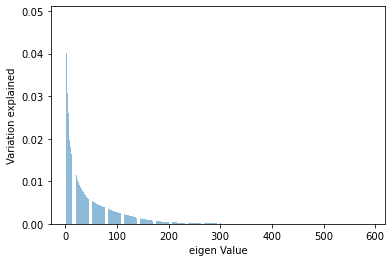

In [27]:
plt.bar(list(range(1,591)), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

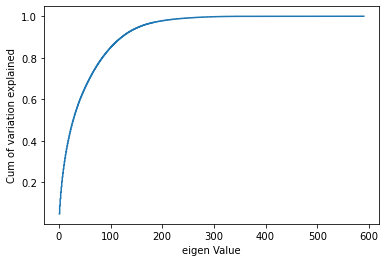

In [28]:
plt.step(list(range(1,591)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

# Dimensionality Reduction

Now 250 dimensions seems very reasonable out of all 590 dimensions of independent variables. With 250 variables we can explain over 95% of the variation in the original data!

In [29]:
pca3 = PCA(n_components=250)
pca3.fit(X)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(X)

[[ 0.0057081   0.00178554  0.01101777 ... -0.0121182  -0.01411023
  -0.00081313]
 [-0.02188914  0.00043308 -0.00693858 ...  0.02731677  0.02592837
   0.0179219 ]
 [-0.01520978 -0.00353469 -0.00013742 ... -0.00504139  0.00736632
   0.01495595]
 ...
 [-0.00284131  0.00721475  0.00356622 ...  0.02728266 -0.03657449
  -0.00690149]
 [ 0.00414121  0.00868076 -0.01761597 ...  0.03753446 -0.03928175
  -0.00095812]
 [ 0.00041274 -0.01527855  0.00735832 ... -0.0118566   0.01142669
  -0.01211346]]
[0.04867192 0.04007832 0.03302959 0.03068931 0.0262111  0.02596965
 0.02174864 0.01971181 0.01947413 0.01805442 0.01720906 0.01651902
 0.01577834 0.01482332 0.01406282 0.01288749 0.0127586  0.01231569
 0.01179474 0.0114918  0.0113867  0.01077808 0.01034875 0.01005829
 0.0097497  0.00957411 0.00900448 0.00887575 0.0085969  0.00844483
 0.00825253 0.00814048 0.0077453  0.00753006 0.00736004 0.00721399
 0.00706967 0.00693298 0.00671558 0.00670298 0.00631392 0.00620029
 0.00609142 0.00597976 0.00590463 0.005

# Transformed inputs/independent variables using PCA

In [30]:
Xpca3

array([[-4.51149723e+00,  4.19151970e-01,  1.27891914e+00, ...,
        -1.26641396e-01,  1.81104367e-01,  7.05893984e-02],
       [-3.08686935e+00,  5.04428315e-02, -1.91673102e+00, ...,
        -1.60962658e-01,  8.45248370e-02, -1.73244554e-01],
       [-8.81245755e-01,  2.63230523e+00, -4.96755704e-01, ...,
         1.17920381e-01,  3.26427117e-01,  5.65698593e-02],
       ...,
       [ 1.44288810e+00, -2.83542711e+00, -1.31867793e+00, ...,
        -2.74392576e-01, -2.52502778e-02, -3.24830289e-03],
       [ 7.05503136e+00,  2.18210850e+00,  3.51049435e-01, ...,
         9.62718687e-02,  2.51533359e-01,  2.44124074e-01],
       [ 6.28080697e+00,  3.43525145e+00,  3.86580958e+00, ...,
         5.51960427e-01, -4.22437394e-02, -2.95639489e-02]])

# SVM Classifier for dimensionally reduced data attributes

In [ ]:
# Split X and y into training and test set in 70:30 ratio for reduced data atributes

X_train, X_test, y_train, y_test = train_test_split(Xpca3, y, test_size=0.30, random_state=1)

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

# Fit a Logistic Regression model to analyse Signal and No-Signal cases 

In [ ]:
from sklearn.linear_model import LogisticRegression
regression_model = LogisticRegression()
regression_model.fit(X, y)
regression_model.score(X, y)

# testing the model with dimensionally reduced & transformed dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
regression_model = LogisticRegression()
regression_model.fit(Xpca3, y)
regression_model.score(Xpca3, y)

# Distribution analysis of Signal/NoSignal cases in the data

In [ ]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x="Pass/Fail",data=ZeeScaledDF3,palette ='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
ZeeScaledDF3["Pass/Fail"].value_counts()

In [ ]:
count_faulty_sig = len(ZeeScaledDF3[ZeeScaledDF3["Pass/Fail"]==-1])
count_correct_sig = len(ZeeScaledDF3[ZeeScaledDF3["Pass/Fail"]==1])
pct_of_faulty_sig = count_faulty_sig/(count_faulty_sig+count_correct_sig)
print("percentage of faulty signal observed is ", pct_of_faulty_sig*100)
pct_of_correct_sig = count_correct_sig/(count_faulty_sig+count_correct_sig)
print("percentage of correct signal observed is ", pct_of_correct_sig*100)


# As the dataset is biased let us sample the dataset accordingly in a suitable way

In [ ]:
# !pip install imblearn

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [ ]:
# !pip install delayed 

In [77]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics


from sklearn.metrics import recall_score

from imblearn.over_sampling import SMOTE

In [78]:
# Place the DataFrames side by side - by columns
Xpca3DF  = pd.DataFrame(Xpca3)
y3Dic = {'Pass/Fail': y} 
y3DF = pd.DataFrame(y3Dic)
#Xpca3ColNmes = Xpca3DF.columns.values
#print(Xpca3ColNmes)
#Xpca3ColNmes.append('Pass/Fail')

principalScaledDF = pd.concat([Xpca3DF, y3DF], axis=1) # stack dataframes by columns
principalScaledDF = principalScaledDF.reset_index(drop=True)
print(principalScaledDF.head(5),'\n')
print(principalScaledDF.shape)

          0         1         2         3         4         5         6  \
0 -4.511497  0.419152  1.278919 -1.625596 -2.680483  1.437766  0.740185   
1 -3.086869  0.050443 -1.916731 -2.431326 -3.920526  3.334743  1.747155   
2 -0.881246  2.632305 -0.496756 -1.213345 -1.817443  1.705329  2.680652   
3 -0.970195  2.573929  3.579734 -0.932523 -0.181650  1.079718  1.295294   
4 -3.378186  0.147840  1.674934 -0.314895  0.308833  2.328615  1.728268   

          7         8         9  ...       241       242       243       244  \
0  0.283424  3.829395 -3.636491  ... -0.372054  0.682543  0.375630  0.024170   
1 -0.221994  4.413186 -2.053774  ... -0.118060 -0.186221 -0.269637  0.128874   
2 -0.480492  4.730047  0.092826  ... -0.056449 -0.367818 -0.057605 -0.170314   
3  1.528135  3.095578  0.463182  ... -0.299136 -0.240390  0.025602  0.110571   
4  1.306160 -3.171353 -0.700009  ...  0.015315  0.108120 -0.077755  0.109698   

        245       246       247       248       249  Pass/Fail  
0 -

In [79]:
# Getting list of column names in transformed dataset
PCAScaledDFColNames = principalScaledDF.columns
print(PCAScaledDFColNames)

Index([          0,           1,           2,           3,           4,
                 5,           6,           7,           8,           9,
       ...
               241,         242,         243,         244,         245,
               246,         247,         248,         249, 'Pass/Fail'],
      dtype='object', length=251)


In [80]:
principalScaledDF.head(10)

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,Pass/Fail
0,-4.511497,0.419152,1.278919,-1.625596,-2.680483,1.437766,0.740185,0.283424,3.829395,-3.636491,...,-0.372054,0.682543,0.375630,0.024170,-0.409133,0.153413,-0.126641,0.181104,0.070589,-1
1,-3.086869,0.050443,-1.916731,-2.431326,-3.920526,3.334743,1.747155,-0.221994,4.413186,-2.053774,...,-0.118060,-0.186221,-0.269637,0.128874,0.240995,0.105061,-0.160963,0.084525,-0.173245,-1
2,-0.881246,2.632305,-0.496756,-1.213345,-1.817443,1.705329,2.680652,-0.480492,4.730047,0.092826,...,-0.056449,-0.367818,-0.057605,-0.170314,-0.078986,0.137539,0.117920,0.326427,0.056570,1
3,-0.970195,2.573929,3.579734,-0.932523,-0.181650,1.079718,1.295294,1.528135,3.095578,0.463182,...,-0.299136,-0.240390,0.025602,0.110571,0.147364,-0.235528,0.250352,-0.119897,-0.030991,-1
4,-3.378186,0.147840,1.674934,-0.314895,0.308833,2.328615,1.728268,1.306160,-3.171353,-0.700009,...,0.015315,0.108120,-0.077755,0.109698,0.105248,-0.056175,-0.147902,-0.232929,0.442215,-1
5,-3.982410,6.023811,-1.024948,-0.561331,-0.019273,1.049878,2.105304,-0.027447,-2.085916,0.936197,...,0.083625,0.112424,-0.147168,-0.156301,-0.336728,-0.008860,-0.021297,0.206028,-0.155789,-1
6,-4.675675,2.028029,1.670891,-2.578793,-0.817868,2.884397,-1.813491,-0.111874,-0.553260,-2.823503,...,0.242786,-0.038623,0.073013,0.362339,-0.101239,0.107817,-0.171547,0.218856,-0.014148,-1
7,-3.761373,3.827298,-4.331689,-1.822686,2.931928,1.650716,3.537092,-0.159277,-0.499725,1.644011,...,-0.108350,0.166755,-0.123886,0.043328,0.406116,0.368415,-0.109109,-0.295841,0.015329,-1
8,-4.513741,4.871694,-1.625260,-1.497174,-0.631847,1.926611,0.644493,3.016980,-3.320429,0.728993,...,-0.284458,0.142253,0.551047,0.025395,0.109688,0.189874,0.232860,-0.074274,0.414201,-1
9,-5.035549,4.558280,-2.991200,-4.073617,2.582669,2.020729,2.254242,2.666659,0.909701,1.592849,...,0.042313,0.209391,-0.401960,-0.064634,0.253804,0.074663,0.157266,-0.370022,-0.197657,-1


# checking for unreal values in the transformed dataset

In [ ]:
principalScaledDF[~principalScaledDF.applymap(np.isreal).all(1)]

# No Unreal values exist in the dimensionally transformed dataset

In [ ]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
principalScaledDF.groupby(["Pass/Fail"]).count()

# Segregate predictors and target columns from the dimensionally transformed dataset

In [ ]:
array = principalScaledDF.values
X = array[:,0:250] # select all rows and first 250(last index is 249) columns which are the attributes
y = array[:,250]   # select all rows and the 251st(index is 250) column which is the 
                   # classification "-1", "1" for the generated signal from semiconductor
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
type(X_train)

# SMOTE to upsample smaller class

In [ ]:
print("Before UpSampling, counts of label '1': {} \n".format(sum(y_train==1)))
print("Before UpSampling, counts of label '-1': {} \n".format(sum(y_train==-1)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


print("After UpSampling, counts of label '1': {} \n".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '-1': {} \n".format(sum(y_train_res==-1)))



print('After UpSampling, the shape of train_X: {} \n'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))


In [ ]:
# Fit the model on original data i.e. before upsampling
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

In [ ]:
test_pred = model.predict(X_test)

print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))

# UpSample smaller class

In [ ]:
# fitting model with upsampled class
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_res, y_train_res)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

# Down Sampling the larger class

In [ ]:
Faulty_Sig_Indices = principalScaledDF[principalScaledDF['Pass/Fail'] == -1].index   # Get the record numbers of Faulty Signal cases
Faulty_Sig = len(principalScaledDF[principalScaledDF['Pass/Fail'] == -1])             # how many Faulty Signal cases
print(Faulty_Sig)
print("\n")
Correct_Sig_Indices = principalScaledDF[principalScaledDF['Pass/Fail'] == 1].index       # record number of the Correct Signal cases
Correct_Sig = len(principalScaledDF[principalScaledDF['Pass/Fail'] == 1])                # how many Correct Signal cases
print(Correct_Sig)


In [ ]:
random_indices = np.random.choice( Faulty_Sig_Indices, Faulty_Sig - 1300 , replace=False)    #Randomly pick up 104 Faulty_Sig_Indices

In [ ]:
down_sampled_indices = np.concatenate([Correct_Sig_Indices,random_indices])  # combine the 120 Faulty_Sig_Indices with Correct_Sig_Indices

In [ ]:
principalScaledDF_down_sample = principalScaledDF.loc[down_sampled_indices]  # Extract all those records for Correct_Sig and Faulty_Sig to create new set
principalScaledDF_down_sample.shape
principalScaledDF_down_sample.groupby(["Pass/Fail"]).count()  # look at the class distribution after downsample

In [ ]:
array = principalScaledDF_down_sample.values
X = array[:,0:250] # select all rows and first 250(last index is 249) columns which are the attributes
Y = array[:,250]   # select all rows and the 251st(index is 250) column which is the 
                   # classification "-1", "1" for the generated signal from semiconductor
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

In [ ]:
print('After DownSampling, the shape of X_train: {}'.format(X_train.shape))
print('After DownSampling, the shape of X_test: {} \n'.format(X_test.shape))


In [ ]:
# Fit the model on 30%
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

## IMBLearn Random Under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

print(X_train.shape,"\n",y_train.shape)

X_rus, y_rus = rus.fit_resample(X_train, y_train)

y_rus


In [ ]:
y_rus.shape

## IMBLearn Random Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [ ]:
y_ros

In [ ]:
y_ros.shape

In [ ]:
X_ros.shape

##  Deleting nearest majority neighbors  TomekLinks



In [ ]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train)   # id_tl is removed instances of majority class
y_tl.shape

In [ ]:
X_tl.shape

## Upsampling followed by downsampling

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek()
X_smt, y_smt = smt.fit_resample(X_train, y_train)
X_smt.shape

## Cluster based undersampling

In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()  
X_cc, y_cc = cc.fit_resample(X_train, y_train)

X_cc.shape

In [ ]:
y_cc

# Training Supervised MachineLearning model on the dimensionally reduced dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(Xpca3, y, test_size=0.30, random_state=1)
# let us choose number of neighbours as 5 for a random experiment
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)


In [ ]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

y_pred = NNH.predict(X_test)
print(NNH.score(X_test, y_test))

In [ ]:
y_test.shape

In [ ]:

# calculate accuracy measures and confusion matrix
from sklearn import metrics

print('Count of predicted One\n\n',
      len(y_pred[y_pred == 1]),'\n\n')
print('Count of observed One\n\n',
      len(y_test[y_test == 1]),'\n\n')

print('Count of predicted NegativeOne\n\n',
      len(y_pred[y_pred == -1]),'\n\n')
print('Count of observed NegativeOne\n\n',
      len(y_test[y_test == -1]),'\n\n')


print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, -1])


print(cm.transpose())

df_cm = pd.DataFrame(cm.transpose(), index = [i for i in ["PredictedOne", "PredictedNegativeOne"]],
                      columns = [i for i in ["ObservedOne", "ObservedNegativeOne"]])
print('\n\n')
print(df_cm)

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_cm, annot=True, fmt='g', ax = ax)

In [ ]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))
    

Scores = pd.Series(scores)
print(Scores.head(25))


plt.plot(range(1,50),scores)

# For nearest neighbours K= 4 or 6 or any value above 6, we obtain highest score for the Supervised Learning model on the test data.

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

X_train, X_test, Y_train, Y_test = train_test_split(Xpca3, y, test_size=0.50, random_state=1)

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

# LOOCV Introduction

In [ ]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import LeaveOneOut

# prepare cross validation
loocv = LeaveOneOut()
# enumerate splits
for train, test in loocv.split(Xpca3):
	print('train: %s, test: %s' % (Xpca3[train], Xpca3[test]))

In [ ]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Xpca3, y, test_size=0.30, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

regression_model = LogisticRegression()
regression_model.fit(x_train, y_train)

# Train R^2
print(regression_model.score(x_train, y_train))

# MeanSquare Error

In [ ]:
# Train MSE
from sklearn.metrics import mean_squared_error
predictedy = regression_model.predict(x_train)
print(mean_squared_error(predictedy, y_train))

In [ ]:
# Test MSE
predictedy = regression_model.predict(x_test)
print(mean_squared_error(predictedy, y_test))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures( degree = 2, include_bias = False) 
xPoly_train = poly.fit_transform(x_train)
xPoly_train[0:2]

In [ ]:
pd.DataFrame(x_train).head(2)

In [ ]:
regression_modelP2 = regression_model.fit(xPoly_train, y_train)

In [ ]:
# Train R^2
print(regression_modelP2.score(xPoly_train, y_train))

# Evaluate the model using Cross Validation
# K-Fold Cross Validation

In [ ]:
# Evaluate using Cross Validation
from sklearn import model_selection

seed = 6
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
kfold = model_selection.KFold(n_splits=20)

model = LogisticRegression()

results = model_selection.cross_val_score(model, Xpca3,y, scoring='neg_mean_squared_error', cv=kfold)
print("Mean Square Error: %.3f (%.3f)" % (-results.mean(), results.std()))

# Apply Feature selection method to find which features fits well and do the plotting

# Features selection

In [ ]:
# ! pip install mlxtend


In [31]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

x_train, x_test, y_train, y_test = train_test_split(Xpca3, y, test_size=0.30, random_state=1)

print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

Training dataset shape: (1096, 250) (1096,)
Testing dataset shape: (471, 250) (471,)


In [32]:
Xpca3.shape

(1567, 250)

In [42]:
# Build Logistic Reg  to use in feature selection
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()

# Build step forward feature selection
sfs1 = sfs(logR, k_features=170, forward=True, scoring='r2', cv=5)

In [43]:
# Perform SFFS
sfs1 = sfs1.fit(x_train, y_train)

In [44]:
sfs1.get_metric_dict()

{1: {'feature_idx': (0,),
  'cv_scores': array([-0.07317073, -0.06829268, -0.06829268, -0.06829268, -0.07352941]),
  'avg_score': -0.07031563845050211,
  'feature_names': ('0',),
  'ci_bound': 0.0031877776739131065,
  'std_dev': 0.0024801993295892628,
  'std_err': 0.0012400996647946314},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([-0.07317073, -0.06829268, -0.06829268, -0.06829268, -0.07352941]),
  'avg_score': -0.07031563845050211,
  'feature_names': ('0', '1'),
  'ci_bound': 0.0031877776739131065,
  'std_dev': 0.0024801993295892628,
  'std_err': 0.0012400996647946314},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([-0.07317073, -0.06829268, -0.06829268, -0.06829268, -0.07352941]),
  'avg_score': -0.07031563845050211,
  'feature_names': ('0', '1', '2'),
  'ci_bound': 0.0031877776739131065,
  'std_dev': 0.0024801993295892628,
  'std_err': 0.0012400996647946314},
 4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([-0.07317073, -0.06829268, -0.06829268, -0.06829268, -0.07

In [45]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

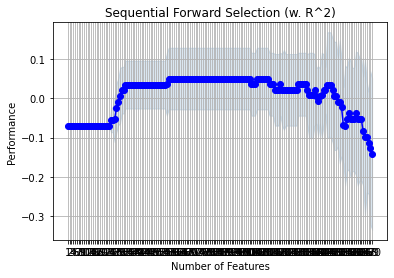

In [46]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

# as the number of features increases, the performance increases in the above trend as shown in the above figure and decreases after selection of certain number of features on the training set extracted from the dataset made by dimensionality reduction

In [52]:
# Which features?
columnList = list(pd.DataFrame(x_train).columns)
print(columnList,"\n")
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [53]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 47, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 73, 74, 77, 81, 82, 84, 85, 87, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 107, 109, 110, 111, 113, 114, 115, 116, 119, 120, 121, 122, 123, 125, 126, 128, 129, 131, 133, 134, 135, 137, 139, 140, 144, 146, 147, 148, 149, 154, 159, 161, 162, 165, 166, 169, 171, 172, 174, 176, 179, 180, 183, 184, 188, 190, 191, 192, 194, 195, 202, 203, 204, 206, 207, 209, 212, 213, 214, 218, 219, 220, 221, 222, 225, 230, 231, 233, 234, 236, 237, 238, 239, 240, 241, 243, 244, 245, 246, 247, 248, 249]


# Now build full model with selected features
# Build full model with selected features

In [67]:
logR = LogisticRegression()
logR.fit(pd.DataFrame(x_train)[subsetColumnList], y_train)

LogisticRegression()

In [68]:
y_train_pred = logR.predict(pd.DataFrame(x_train)[subsetColumnList])
print('Training accuracy on selected features: %.3f' % logR.score(pd.DataFrame(x_train)[subsetColumnList], y_train))

Training accuracy on selected features: 0.947


In [69]:
y_test_pred = logR.predict(pd.DataFrame(x_test)[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % logR.score(pd.DataFrame(x_test)[subsetColumnList], y_test))

Testing accuracy on selected features: 0.915


# Build full model on all features as comparison
# Build full model on ALL features, for comparison

In [70]:
logR = LogisticRegression()
logR.fit(x_train, y_train)

LogisticRegression()

In [71]:
y_train_pred = logR.predict(x_train)
print('Training accuracy on selected features: %.3f' % logR.score(x_train, y_train))

Training accuracy on selected features: 0.977


In [72]:
y_test_pred = logR.predict(x_test)
print('Testing accuracy on selected features: %.3f' % logR.score(x_test, y_test))

Testing accuracy on selected features: 0.896


# So by eliminating certain features(Taking only 170 features) of the dimensionally reduced dataset, we are able to achieve relatively higher accuracy on the test data compared with the case of choosing all 250 features in dimensionally reduced dataset

# LOOCV

In [73]:

from sklearn.model_selection import LeaveOneOut 
from sklearn.model_selection import cross_val_score

# prepare cross validation 
loocv = LeaveOneOut() 
model = LogisticRegression()


results = cross_val_score(model, Xpca3, y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


Accuracy: 89.726% (30.362%)


In [122]:
from sklearn.utils import resample 
import numpy as np
n_size = int(len(principalScaledDF)*0.50)
n_iterations = 50
stats = list()
Values = principalScaledDF.values
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(Values, n_samples=n_size) 
    # Sampling with replacement 
    test = np.array([x for x in Values if x.tolist() not in train.tolist()])
    # picking rest of the data not considered in sample
    
    print("Train_data ->",train, "\n" , "Test_data ->",test)

    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import accuracy_score

    # fit model
    model = DecisionTreeClassifier()
    model.fit(train[:,:-1], train[:,-1]) # evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions) 
    # overall accuracy score can mislead when classes are imbalanced
    print(score) 
    stats.append(score)

Train_data -> [[ 0.65229753 -3.0706311  -3.60938441 ...  0.04368197  0.12513863
  -1.        ]
 [-6.00777958  2.57638736  0.15267463 ...  0.18372326 -0.07862897
  -1.        ]
 [ 0.31456683 -1.30234135  0.48937566 ... -0.21892039  0.24507708
  -1.        ]
 ...
 [-2.685347   -2.69664002  1.53693236 ...  0.10377606 -0.04832897
  -1.        ]
 [-3.1884477  -2.01165253 -1.92575818 ... -0.27222794 -0.28546045
  -1.        ]
 [ 1.68525248 -1.8362914  -2.72501806 ... -0.15736086 -0.041446
  -1.        ]] 
 Test_data -> [[-4.51149723  0.41915197  1.27891914 ...  0.18110437  0.0705894
  -1.        ]
 [-0.88124575  2.63230523 -0.4967557  ...  0.32642712  0.05656986
   1.        ]
 [-0.97019465  2.57392932  3.57973388 ... -0.11989703 -0.03099119
  -1.        ]
 ...
 [ 6.60567499  0.82906335  0.90953394 ...  0.3673227  -0.01493141
  -1.        ]
 [-0.8068622   1.8493697  -5.01139198 ...  0.09048873 -0.11461799
  -1.        ]
 [ 7.05503136  2.1821085   0.35104944 ...  0.25153336  0.24412407
  -1. 

# Model accuracy estimates using BootStrapping

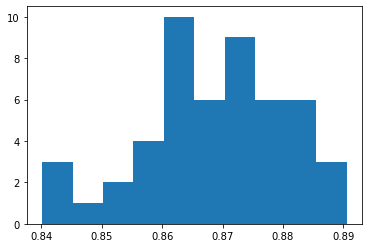

95.0 confidence interval 84.3% and 89.0%


In [126]:
import matplotlib
import matplotlib.pyplot as plt
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# ROC AUC

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

import pylab as pl
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
random_state = np.random.RandomState(0)

X_train, X_test, y_train, y_test = train_test_split(Xpca3, y, test_size=0.50, random_state=1)
classifier1 = LogisticRegression()
classifier2 = svm.SVC(kernel='linear', probability=True)
probas1_ = classifier1.fit(X_train, y_train).predict_proba(X_test)
probas2_ = classifier2.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and area the curve for logistic
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve for logistic: %f" % roc_auc1)

Area under the ROC curve for logistic: 0.597336


In [130]:
# Compute ROC curve and area the curve for SVC
fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve for SVC: %f" % roc_auc2)

Area under the ROC curve for SVC: 0.568239


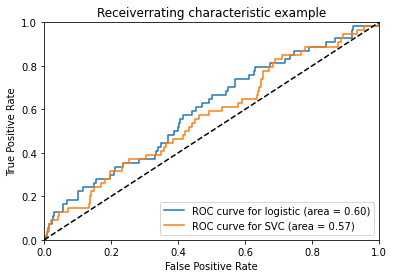

In [131]:
# Plot the ROC

# Plot ROC curve
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for logistic (area = %0.2f)' % roc_auc1)
pl.plot(fpr2, tpr2, label='ROC curve for SVC (area = %0.2f)' % roc_auc2)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

In [132]:
import pandas as pd

i = np.arange(len(tpr1)) # index for df
roc1 = pd.DataFrame({'fpr1' : pd.Series(fpr1, index=i),'tpr1' : pd.Series(tpr1, index = i), '1-fpr1' : pd.Series(1-fpr1, index = i), 'tf1' : pd.Series(tpr1 - (1-fpr1), index = i), 'thresholds1' : pd.Series(thresholds1, index = i)})
print(roc1.loc[(roc1.tf1-0).abs().argsort()[:1]])

i = np.arange(len(tpr2)) # index for df
roc2 = pd.DataFrame({'fpr2' : pd.Series(fpr2, index=i),'tpr2' : pd.Series(tpr2, index = i), '1-fpr2' : pd.Series(1-fpr2, index = i), 'tf2' : pd.Series(tpr2 - (1-fpr2), index = i), 'thresholds2' : pd.Series(thresholds2, index = i)})
print(roc2.loc[(roc2.tf2-0).abs().argsort()[:1]])

        fpr1      tpr1    1-fpr1       tf1  thresholds1
61  0.415068  0.574074  0.584932 -0.010857     0.003196
        fpr2      tpr2    1-fpr2      tf2  thresholds2
57  0.450685  0.555556  0.549315  0.00624      0.05965


In [133]:
roc1.head(71)

,fpr1,tpr1,1-fpr1,tf1,thresholds1
0,0.000000,0.000000,1.000000,-1.000000,1.999850
1,0.001370,0.000000,0.998630,-0.998630,0.999850
2,0.004110,0.000000,0.995890,-0.995890,0.998857
3,0.004110,0.018519,0.995890,-0.977372,0.998826
4,0.008219,0.018519,0.991781,-0.973262,0.994261
...,...,...,...,...,...
66,0.472603,0.611111,0.527397,0.083714,0.001735
67,0.472603,0.629630,0.527397,0.102232,0.001714
68,0.491781,0.629630,0.508219,0.121410,0.001521
69,0.491781,0.648148,0.508219,0.139929,0.001518


In [134]:
roc2.head(71)

,fpr2,tpr2,1-fpr2,tf2,thresholds2
0,0.000000,0.000000,1.000000,-1.000000,1.274077
1,0.001370,0.000000,0.998630,-0.998630,0.274077
2,0.002740,0.000000,0.997260,-0.997260,0.236292
3,0.002740,0.018519,0.997260,-0.978742,0.232339
4,0.009589,0.018519,0.990411,-0.971892,0.208956
...,...,...,...,...,...
66,0.590411,0.629630,0.409589,0.220041,0.047581
67,0.590411,0.648148,0.409589,0.238559,0.047573
68,0.635616,0.648148,0.364384,0.283765,0.044423
69,0.635616,0.666667,0.364384,0.302283,0.044355


# ROC Threshold Management

In [169]:
# make class predictions for the testing set
y_pred_class = classifier1.predict(X_test)

y_pred_class[0:10]

array([-1, -1,  1, -1, -1, -1, -1, -1, -1,  1])

In [156]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.8788265306122449


## Confusion matrix

Table that describes the performance of a classification model

Count of predicted One

 59 


Count of observed One

 54 


Count of predicted NegativeOne

 725 


Count of observed NegativeOne

 730 


Confusion Matrix
[[  9  50]
 [ 45 680]]



                      ObservedOne  ObservedNegativeOne
PredictedOne                    9                   50
PredictedNegativeOne           45                  680


<AxesSubplot:>

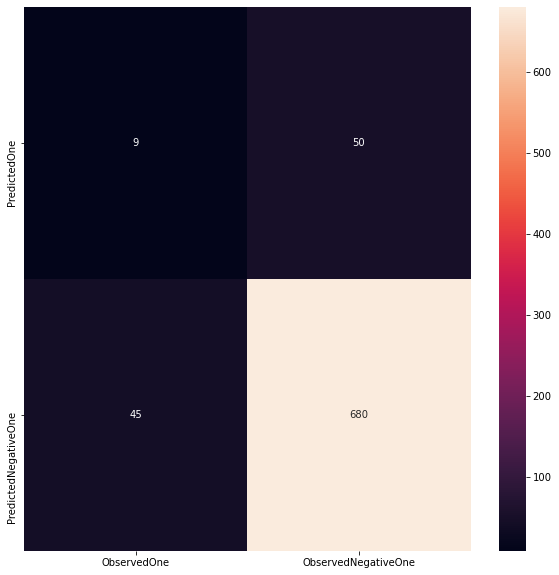

In [170]:
import matplotlib.pyplot as plt
import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics

print('Count of predicted One\n\n',
      len(y_pred_class[y_pred_class == 1]),'\n\n')
print('Count of observed One\n\n',
      len(y_test[y_test == 1]),'\n\n')

print('Count of predicted NegativeOne\n\n',
      len(y_pred_class[y_pred_class == -1]),'\n\n')
print('Count of observed NegativeOne\n\n',
      len(y_test[y_test == -1]),'\n\n')


print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred_class, labels=[1, -1])


print(cm.transpose())

df_cm = pd.DataFrame(cm.transpose(), index = [i for i in ["PredictedOne", "PredictedNegativeOne"]],
                      columns = [i for i in ["ObservedOne", "ObservedNegativeOne"]])
print('\n\n')
print(df_cm)

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_cm, annot=True, fmt='g', ax = ax)

In [171]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class, labels=[1,-1]))

              precision    recall  f1-score   support

           1       0.15      0.17      0.16        54
          -1       0.94      0.93      0.93       730

    accuracy                           0.88       784
   macro avg       0.55      0.55      0.55       784
weighted avg       0.88      0.88      0.88       784



## Adjusting the classification threshold

In [172]:
# print the first 10 predicted class with default threshold of .5
classifier1.predict(X_test)[0:10]

array([-1, -1,  1, -1, -1, -1, -1, -1, -1,  1])

In [173]:
# print the first 10 predicted probabilities of class membership
classifier1.predict_proba(X_test)[0:10, :]

array([[6.06044717e-01, 3.93955283e-01],
       [9.99656445e-01, 3.43555429e-04],
       [9.69282049e-02, 9.03071795e-01],
       [9.99995412e-01, 4.58839643e-06],
       [9.96122377e-01, 3.87762268e-03],
       [9.99307610e-01, 6.92390180e-04],
       [9.99999577e-01, 4.22766823e-07],
       [9.99843244e-01, 1.56756008e-04],
       [9.38560263e-01, 6.14397371e-02],
       [2.78736284e-01, 7.21263716e-01]])

In [174]:
# print the first 10 predicted probabilities for class 1  (signal is correct)
classifier1.predict_proba(X_test)[0:10, 1]

array([3.93955283e-01, 3.43555429e-04, 9.03071795e-01, 4.58839643e-06,
       3.87762268e-03, 6.92390180e-04, 4.22766823e-07, 1.56756008e-04,
       6.14397371e-02, 7.21263716e-01])

In [175]:
# store the predicted probabilities for diabetic class for all records... 
y_pred_prob = classifier1.predict_proba(X_test)[:, 1]

# Reduce the threshold from 0.5 to 0.3 to predict the Correct Signal class. This will make the model sensitive to Correct Signal class

In [181]:
# predict Correct Signal if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.5)[0]
y_pred_class_RT = binarize([y_pred_prob], 0.3)[0]  # deciding the class of the 1st 10 records based on new threshold

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=0.5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [182]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([3.93955283e-01, 3.43555429e-04, 9.03071795e-01, 4.58839643e-06,
       3.87762268e-03, 6.92390180e-04, 4.22766823e-07, 1.56756008e-04,
       6.14397371e-02, 7.21263716e-01])

In [187]:
# print the first 10 predicted classes with the lower threshold(0.3). 
# Note the change in class...
# with threshold of .5 (default) , 
# the first data point would belong to 1(1,0=>binarized)class 
# i.e. Correct Signal instead of Faulty Signal for reduced threshold
print(y_pred_class[0:10])
print(y_pred_class_RT[0:10])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 1. 0. 0. 0. 0. 0. 0. 1.]


In [188]:
# Imputing -1 class with 0 (binarizing)
y_test[y_test==-1]=0
print(y_test[0:10])

60      0
995     0
1469    0
895     0
321     1
986     0
1437    0
1431    0
259     0
8       0
Name: Pass/Fail, dtype: int64


In [189]:
# previous confusion matrix (default threshold of 0.5)
print("Confusion Matrix\n")
cm=metrics.confusion_matrix(y_test, y_pred_class, labels=[1, 0])
print(cm.transpose())

Confusion Matrix

[[  9  50]
 [ 45 680]]


In [190]:
# latest confusion matrix (default threshold of 0.3)
print("Confusion Matrix\n")
cm=metrics.confusion_matrix(y_test, y_pred_class_RT, labels=[1, 0])
print(cm.transpose())

Confusion Matrix

[[ 10  73]
 [ 44 657]]


In [191]:
# Updated classification Report after binarizing
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class_RT, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.12      0.19      0.15        54
           0       0.94      0.90      0.92       730

    accuracy                           0.85       784
   macro avg       0.53      0.54      0.53       784
weighted avg       0.88      0.85      0.87       784



# Observations:

- Default threshold of .5 is not sensitive towards Correct Signal class. Lowering the threshold increases the sensitivity to
- Correct Signal class


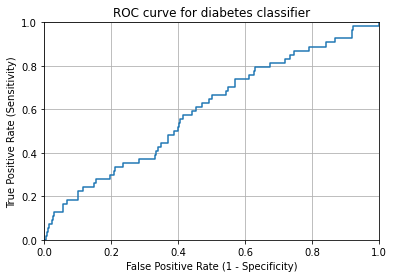

In [192]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- ROC curve can help you to **choose a threshold** that balances sensitivity and specificity in a way that makes sense for your particular context
- You can't actually **see the thresholds** used to generate the curve on the ROC curve itself

In [193]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [194]:
evaluate_threshold(0.5)

Sensitivity: 0.16666666666666666
Specificity: 0.9315068493150684


In [195]:
evaluate_threshold(0.3)

Sensitivity: 0.18518518518518517
Specificity: 0.9


# AUC is the **percentage** of the ROC plot that is **underneath the curve**:

In [196]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.5973363774733638


- AUC is useful as a **single number summary** of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a **higher predicted probability** to the positive observation.
- AUC is useful even when there is **high class imbalance** (unlike classification accuracy).

In [197]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(classifier1, Xpca3, y, cv=10, scoring='roc_auc').mean()

0.5354769952813005

**Confusion matrix advantages:**

- Allows you to calculate a **variety of metrics**
- Useful for **multi-class problems** (more than two response classes)

**ROC/AUC advantages:**

- Does not require you to **set a classification threshold**
- Still useful when there is **high class imbalance**

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier

lrcl =  LogisticRegression()
nbcl =  GaussianNB()
dtcl = DecisionTreeClassifier()
lr = LinearRegression()
knncl =  KNeighborsClassifier()
svcl= SVC()
svr = SVR()
rfcl =  RandomForestClassifier()
bgcl =  BaggingClassifier()
nncl = MLPClassifier()


for clf, label in zip([lrcl , nbcl, dtcl, lr, knncl, svcl, svr,  rfcl, bgcl, nncl], 
    ['lrcl' , 'nbcl', 'dtcl', 'lr', 'knncl', 'svcl', 'svr',  'rfcl',  'bgcl', 'nncl']):
    print("model name: " , label)
    print("\n model_hyperparameters \n" , clf.get_params() )


model name:  lrcl

 model_hyperparameters 
 {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
model name:  nbcl

 model_hyperparameters 
 {'priors': None, 'var_smoothing': 1e-09}
model name:  dtcl

 model_hyperparameters 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
model name:  lr

 model_hyperparameters 
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}
model name:  knncl

 model_hyperparameters 
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski',

# 4. Split the dataset into train set test set also the validation 
Always a good practice to split the dataset into 3 sets

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

# 5. Build the pipeline
Steps:

Instantiate the pipeline, as first defining standard scaler and on the scaled data run the PCA and then feed it to the logistic regression(or any other algo)

Hint:

Import standard scaler to standardize the data

You can take an algorithm of choice and build a pipeline

In [203]:
#PCA - to reduce dimensions according the analysis done 
# earlier in the page
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 

pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=250)), ('clf', LogisticRegression(random_state=1))]) 
pipe_lr.fit(X_train, y_train) 
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.875


# 6.Follow the above steps and check if you can tweak the logistic regression parameters above and make use of Grid search(can use any algorithm)

In [204]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 

pipe_svc = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=250)), ('svc', SVC())]) 


param_grid = {'pca__n_components':[200,225,250],'svc__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10], 'svc__kernel':['rbf','poly']} 

grid = GridSearchCV( pipe_svc , param_grid = param_grid, cv = 5) 

grid.fit( X_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid.score( X_test, y_test)))

 Best cross-validation accuracy: 0.92
 Best parameters:  {'pca__n_components': 200, 'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
 Test set accuracy: 0.94


In [205]:
grid.predict(X_test)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

# 7. Optimize the model parameters(can make use of any algorithm)
Make use of Grid search for hyper parameter

Steps:
Split the dataset into train and test set

Make use of any algorithm , from the list of hyper parameters you get apply param grid 

Once hyper parameter grid is defined, import grid search CV and fit x_train and y_train

Find the best params and mean test score


In [206]:
#split the dataset into train and test set
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(Xpca3, y, stratify = y,random_state = 7)

In [207]:
from sklearn.neighbors import KNeighborsClassifier
### Number of nearest neighbors
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [209]:
from sklearn.metrics import accuracy_score

param_grid = {'n_neighbors': list(range(1,9)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(knn_clf,param_grid,cv=10)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [210]:
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 4}

In [211]:
gs.cv_results_['mean_test_score']

array([0.90639577, 0.92937129, 0.92427206, 0.93447052, 0.9319209 ,
       0.9319209 , 0.9319209 , 0.93362306, 0.90639577, 0.92937129,
       0.92427206, 0.93447052, 0.9319209 , 0.9319209 , 0.9319209 ,
       0.93362306, 0.90639577, 0.92937129, 0.92427206, 0.93447052,
       0.9319209 , 0.9319209 , 0.9319209 , 0.93362306, 0.90639577,
       0.92937129, 0.92427206, 0.93447052, 0.9319209 , 0.9319209 ,
       0.9319209 , 0.93362306])

In [216]:
%matplotlib inline
import numpy as np
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [217]:
# build a classifier
clf = RandomForestClassifier(n_estimators=50)

In [218]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 250),
              "min_samples_split": sp_randint(2, 900),
              "min_samples_leaf": sp_randint(1, 900),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [219]:
# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples) #default cv = 3

randomCV.fit(Xpca3, y)

 
print(randomCV.best_params_)


{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 232, 'min_samples_leaf': 296, 'min_samples_split': 688}


In [220]:
# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [200,225,250],
              "min_samples_split": [800,900],
              "min_samples_leaf": [800,900],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(Xpca3, y)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=50),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None],
                         'max_features': [200, 225, 250],
                         'min_samples_leaf': [800, 900],
                         'min_samples_split': [800, 900]})

In [221]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 200,
 'min_samples_leaf': 800,
 'min_samples_split': 800}

In [222]:
grid_search.cv_results_['mean_test_score']

array([0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93363179,
       0.93363179, 0.93363179, 0.93363179, 0.93363179, 0.93363

In [223]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, max_features=200, min_samples_leaf=800,
                       min_samples_split=800, n_estimators=50)

In [224]:
FuturePred_DF = pd.read_excel("/Users/sree/Downloads/PGP_AIML/DataSets/05-21-AC_Week3-Featurization-ModelSelection & Tuning/Future_predictions.xlsx")
FuturePred_DF.head(5)

,Time,0,1,2,3,4,5,6,7,8,...,580,581,582,583,584,585,586,587,588,589
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100,100.3967,0.1235,1.5031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [259]:
FuturePred_DF1 = FuturePred_DF.drop(["Time"],axis = 1 )
print(FuturePred_DF.shape,"\n")
print(FuturePred_DF1.shape,"\n")
print(FuturePred_DF1.dtypes)

## using apply method
#FuturePred_DF1 = FuturePred_DF1.apply(pd.to_numeric)
print(FuturePred_DF1.dtypes)
print(FuturePred_DF1.info())

(18, 591) 

(18, 590) 

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
585    float64
586    float64
587    float64
588    float64
589    float64
Length: 590, dtype: object
0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
585    float64
586    float64
587    float64
588    float64
589    float64
Length: 590, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Columns: 590 entries, 0 to 589
dtypes: float64(458), int64(132)
memory usage: 83.1 KB
None


In [260]:
##Identify duplicates records in the data
dupes = FuturePred_DF1.duplicated()
print("Duplicated record count in the dataset is\n",sum(dupes))


# Checking for missing values
print("\nMissing value Details\n",FuturePred_DF1.isna().sum(),"\n")


##number of missing values (only the ones recognised as missing values) in each of the attributes
pd.DataFrame( FuturePred_DF1.isnull().sum(), columns= ['Number of missing values'])

Duplicated record count in the dataset is
 0

Missing value Details
 0      0
1      0
2      0
3      0
4      0
      ..
585    0
586    1
587    1
588    1
589    1
Length: 590, dtype: int64 



,Number of missing values
0,0
1,0
2,0
3,0
4,0
...,...
585,0
586,1
587,1
588,1


In [261]:
FuturePred_DF1.shape
columnNames1 = FuturePred_DF1.columns

for x in columnNames1:
        FuturePred_DF1[x].fillna(FuturePred_DF1[x].median(), inplace = True) 

        


In [262]:
# number of missing values (only the ones recognised as missing values) in each of the attributes/columns 
# in the corrected dataset
pd.DataFrame(FuturePred_DF1.isna().sum(), columns= ['Number of missing values'])

,Number of missing values
0,0
1,0
2,0
3,0
4,0
...,...
585,0
586,0
587,0
588,0


In [263]:
FuturePred_DF1.isna().any

<bound method DataFrame.any of       0      1      2      3      4      5      6      7      8      9    ...  \
0   False  False  False  False  False  False  False  False  False  False  ...   
1   False  False  False  False  False  False  False  False  False  False  ...   
2   False  False  False  False  False  False  False  False  False  False  ...   
3   False  False  False  False  False  False  False  False  False  False  ...   
4   False  False  False  False  False  False  False  False  False  False  ...   
5   False  False  False  False  False  False  False  False  False  False  ...   
6   False  False  False  False  False  False  False  False  False  False  ...   
7   False  False  False  False  False  False  False  False  False  False  ...   
8   False  False  False  False  False  False  False  False  False  False  ...   
9   False  False  False  False  False  False  False  False  False  False  ...   
10  False  False  False  False  False  False  False  False  False  False  ... 

In [264]:
from sklearn.preprocessing import StandardScaler
Zeescaler = StandardScaler()

ZeeScaledDFTest = pd.DataFrame(Zeescaler.fit_transform(FuturePred_DF1))

print(FuturePred_DF1.shape,"\n")

print(ZeeScaledDFTest.head(30))

(18, 590) 

         0         1         2         3         4    5         6         7    \
0   0.633604  0.551712 -1.265365  0.849035  0.547452  0.0 -1.620743  0.924037   
1   1.978732 -0.893073  0.280677  1.060345 -1.372940  0.0 -0.187504  1.139487   
2  -1.405765  0.492377 -1.313251  2.003007  1.090140  0.0 -2.264791  0.880948   
3  -0.241923 -0.677363 -0.856119 -1.167502  0.403458  0.0  0.386215 -0.153208   
4   0.660776 -0.341670  0.387317  0.508718  1.174075  0.0 -0.777344  0.622409   
5  -1.122842 -1.365119  0.387317  0.508718  1.174075  0.0 -0.777344  0.622409   
6   0.619914 -1.404871  0.280677  1.060345 -1.372940  0.0 -0.187504  1.139487   
7   1.213347  2.395324  0.949879 -0.786680 -1.521275  0.0  0.993235 -1.532083   
8  -0.678338  1.084701  0.949879 -0.786680 -1.521275  0.0  0.993235 -1.532083   
9   0.326205 -1.430446  0.949879 -0.786680 -1.521275  0.0  0.993235 -1.532083   
10 -0.131367  0.320950 -0.997765 -0.619039  0.403458  0.0  0.114506  0.105331   
11 -1.483963 -0.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [265]:
# number of missing values (only the ones recognised as missing values) in each of the attributes/columns 
# in the corrected dataset
pd.DataFrame(ZeeScaledDFTest.isna().sum(), columns= ['Number of missing values'])

,Number of missing values
0,0
1,0
2,0
3,0
4,0
...,...
585,0
586,0
587,0
588,0


In [275]:
np.all(np.isfinite(ZeeScaledDFTest))

False

In [315]:
ZeeScaledDFTest[np.isfinite(ZeeScaledDFTest) == False] = 0 # np.median(ZeeScaledDFTest[~np.isfinite(ZeeScaledDFTest)])

ZeeScaledDFTest=ZeeScaledDFTest.mask(ZeeScaledDFTest==0).fillna(ZeeScaledDFTest.median())


In [342]:
X = ZeeScaledDF3.drop("Pass/Fail",axis = 1)
y = ZeeScaledDF3["Pass/Fail"]
print(ZeeScaledDF3.shape)
print(X.shape)
print(y.shape)

# Split X and y into training and test set in 70:30 ratio for all data atributes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

(1567, 591)
(1567, 590)
(1567,)
Accuracy on training set: 0.93
Accuracy on test set: 0.93


In [343]:
# predicting with out any pickling of model

y_pred_calc = svc.predict(ZeeScaledDFTest)
print(y_pred_calc)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [349]:
y3Dic = {'Pass/Fail': y_pred_calc} 
y3DF = pd.DataFrame(y3Dic)
#Xpca3ColNmes = Xpca3DF.columns.values
#print(Xpca3ColNmes)
#Xpca3ColNmes.append('Pass/Fail')

ZeeScaledDFTest1 = pd.concat([ZeeScaledDFTest, y3DF], axis=1) # stack dataframes by columns
ZeeScaledDFTest1 = ZeeScaledDFTest1.reset_index(drop=True)
print(ZeeScaledDFTest1.head(5))
#ZeeScaledDFTest1.to_csv("/Users/sree/Downloads/PGP_AIML/DataSets/05-21-AC_Week3-Featurization-ModelSelection & Tuning/DFTest.csv", encoding = "utf-8")



          0         1         2         3         4    5         6         7  \
0  0.633604  0.551712 -1.265365  0.849035  0.547452  0.0 -1.620743  0.924037   
1  1.978732 -0.893073  0.280677  1.060345 -1.372940  0.0 -0.187504  1.139487   
2 -1.405765  0.492377 -1.313251  2.003007  1.090140  0.0 -2.264791  0.880948   
3 -0.241923 -0.677363 -0.856119 -1.167502  0.403458  0.0  0.386215 -0.153208   
4  0.660776 -0.341670  0.387317  0.508718  1.174075  0.0 -0.777344  0.622409   

          8         9  ...       581       582       583       584       585  \
0 -0.207971  0.747091  ... -0.217757  0.346901 -0.276983 -0.263185 -0.275793   
1 -0.308727 -0.240923  ...  3.305356  0.587064 -0.177817 -0.176500 -0.181537   
2 -1.677977  0.031225  ... -0.217757 -0.459359 -0.240150 -0.245848 -0.239049   
3 -0.525740 -0.944957  ... -0.471202  0.089584 -0.291149 -0.306527 -0.289766   
4 -0.140800 -0.394746  ... -0.217757 -3.169765  4.112767  4.114396  4.113491   

        586       587       588       

In [ ]:
import pickle
pickle.dump(svc, open("/Users/sree/Downloads/PGP_AIML/DataSets/05-21-AC_Week3-Featurization-ModelSelection & Tuning/DFTest.csv", 'wb'))

In [352]:
# load the model from disk
loaded_model = pickle.load(open("DFTest.csv", 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9320594479830149


In [353]:
y_pred_test = loaded_model.predict(ZeeScaledDFTest) # with Future Prediction data as input

In [354]:
print(y_pred_test)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


# So for the future preiction input we got all the predictions as faulty signal generated during semiconductor manufacture